# `project` 
## Objective: develop a machine learning model to predict user churn for client Waze comapny's app (designed for drivers).

1. who is your audience for this project?
   -- Waze data team and cross-functional members.
2. what you are trying to solve or accomplish? what do you anticipate the impact of this work will be on the larger needs?
   -- develop a machine learning model to predict user churn.
3. what questions need to be asked or answered?
   -- what is the condition of the provided dataset?
   -- what variables would be the most useful?
   -- are there trends within the data that can provide insight?
   -- what steps can i take to reduce the impact of bias?
4. what resources are required?
    -- project dataset, python notebook, input from stakeholders.
5. what are the deliverables?
    -- a dataset scrubbed for EDA, visualization, statistical model, regression analysis/machine learning model.

### plan: 
1. first make choices about the methods needed
2. establish PACE workflow
3. write a project proposal
### analyse:
1. compile summary information about the data
2. begin EDA and data cleaning
3. visualization building
4. compute descriptive statistics(hypothesis testing)
5. regression model building/machine learning model building
### construct:
1. visualization building
2. hypothesis testing/regression model/machine learning model building and evaluation for model accuracy
### execute:
1. communicate final insights with satkeholders

## proposal:
1. outline project workflow(PACE)
2. gather data from various sources
3. identify software/hardware needs
4. clean, convert, format data into a database
5. finalize modeling strategies, build machine learning models, test models for accuracy
6. finalize results, visualizations for sharing with executive summaries

**NOTE: need to involve/update stakeholders during each step.**

# step1: first explore on data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('portfolio_project_Waze/waze_dataset.csv')

In [3]:
df.head(5)

ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0  retained       283     226      296.748273                     2276   
1   1  retained       133     107      326.896596                     1225   
2   2  retained       114      95      135.522926                     2651   
3   3  retained        49      40       67.589221                       15   
4   4  retained        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days   device  
0              1985.775061             28            19  Android  
1              3160.472914             13            11   iPhone  
2              1610.735904             14             8  Android  
3               587.196542              7             3   iPhone  
4              1219.555924             27            18  Android

In [4]:
df.info()
# df.size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [5]:
# since 'label' has missing values, need to check whether missing values have great impact
null_df = df[df['label'].isnull()]

In [6]:
null_df.describe()

ID    sessions      drives  total_sessions  \
count    700.000000  700.000000  700.000000      700.000000   
mean    7405.584286   80.837143   67.798571      198.483348   
std     4306.900234   79.987440   65.271926      140.561715   
min       77.000000    0.000000    0.000000        5.582648   
25%     3744.500000   23.000000   20.000000       94.056340   
50%     7443.000000   56.000000   47.500000      177.255925   
75%    11007.000000  112.250000   94.000000      266.058022   
max    14993.000000  556.000000  445.000000     1076.879741   

       n_days_after_onboarding  total_navigations_fav1  \
count               700.000000              700.000000   
mean               1709.295714              118.717143   
std                1005.306562              156.308140   
min                  16.000000                0.000000   
25%                 869.000000                4.000000   
50%                1650.500000               62.500000   
75%                2508.750000              169.250000   
max                3498.000000             1096.000000   

       total_navigations_fav2  driven_km_drives  duration_minutes_drives  \
count              700.000000        700.000000               700.000000   
mean                30.371429       3935.967029              1795.123358   
std                 46.306984       2443.107121              1419.242246   
min                  0.000000        290.119811                66.588493   
25%                  0.000000       2119.344818               779.009271   
50%                 10.000000       3421.156721              1414.966279   
75%                 43.000000       5166.097373              2443.955404   
max                352.000000      15135.391280              9746.253023   

       activity_days  driving_days  
count     700.000000    700.000000  
mean       15.382857     12.125714  
std         8.772714      7.626373  
min         0.000000      0.000000  
25%         8.000000      6.000000  
50%        15.000000     12.000000  
75%        23.000000     18.000000  
max        31.000000     30.000000

In [7]:
not_null_df = df[~df['label'].isnull()]

In [8]:
not_null_df.describe()

ID      sessions        drives  total_sessions  \
count  14299.000000  14299.000000  14299.000000    14299.000000   
mean    7503.573117     80.623820     67.255822      189.547409   
std     4331.207621     80.736502     65.947295      136.189764   
min        0.000000      0.000000      0.000000        0.220211   
25%     3749.500000     23.000000     20.000000       90.457733   
50%     7504.000000     56.000000     48.000000      158.718571   
75%    11257.500000    111.000000     93.000000      253.540450   
max    14998.000000    743.000000    596.000000     1216.154633   

       n_days_after_onboarding  total_navigations_fav1  \
count             14299.000000            14299.000000   
mean               1751.822505              121.747395   
std                1008.663834              147.713428   
min                   4.000000                0.000000   
25%                 878.500000               10.000000   
50%                1749.000000               71.000000   
75%                2627.500000              178.000000   
max                3500.000000             1236.000000   

       total_navigations_fav2  driven_km_drives  duration_minutes_drives  \
count            14299.000000      14299.000000             14299.000000   
mean                29.638296       4044.401535              1864.199794   
std                 45.350890       2504.977970              1448.005047   
min                  0.000000         60.441250                18.282082   
25%                  0.000000       2217.319909               840.181344   
50%                  9.000000       3496.545617              1479.394387   
75%                 43.000000       5299.972162              2466.928876   
max                415.000000      21183.401890             15851.727160   

       activity_days  driving_days  
count   14299.000000  14299.000000  
mean       15.544653     12.182530  
std         9.016088      7.833835  
min         0.000000      0.000000  
25%         8.000000      5.000000  
50%        16.000000     12.000000  
75%        23.000000     19.000000  
max        31.000000     30.000000

In [9]:
# get count of null values by device
null_df['device'].value_counts()

device
iPhone     447
Android    253
Name: count, dtype: int64

In [10]:
null_df['device'].value_counts(normalize=True)

device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64

In [11]:
df['device'].value_counts(normalize=True)

device
iPhone     0.644843
Android    0.355157
Name: proportion, dtype: float64

In [12]:
print(df['label'].value_counts(normalize=True))

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


In [13]:
df.groupby('label').median(numeric_only=True)

ID  sessions  drives  total_sessions  n_days_after_onboarding  \
label                                                                         
churned   7477.5      59.0    50.0      164.339042                   1321.0   
retained  7509.0      56.0    47.0      157.586756                   1843.0   

          total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
label                                                                        
churned                     84.5                    11.0       3652.655666   
retained                    68.0                     9.0       3464.684614   

          duration_minutes_drives  activity_days  driving_days  
label                                                           
churned               1607.183785            8.0           6.0  
retained              1458.046141           17.0          14.0

In [14]:
# add columns for further observation
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['drives_per_driving_day'] = df['drives'] / df['driving_days']

In [15]:
df.head()

ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0  retained       283     226      296.748273                     2276   
1   1  retained       133     107      326.896596                     1225   
2   2  retained       114      95      135.522926                     2651   
3   3  retained        49      40       67.589221                       15   
4   4  retained        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days   device  \
0              1985.775061             28            19  Android   
1              3160.472914             13            11   iPhone   
2              1610.735904             14             8  Android   
3               587.196542              7             3   iPhone   
4              1219.555924             27            18  Android   

   km_per_drive  km_per_driving_day  drives_per_driving_day  
0     11.632058          138.360267               11.894737  
1    128.186173         1246.901868                9.727273  
2     32.201567          382.393602               11.875000  
3     22.839778          304.530374               13.333333  
4     58.091206          219.455667                3.777778

In [16]:
meidan_km_per_drive = df.groupby('label').median(numeric_only=True)[['km_per_drive']]
median_km_per_driving_day = df.groupby('label').median(numeric_only=True)[['km_per_driving_day']]
median_drive_per_driving_day = df.groupby('label').median(numeric_only=True)[['drives_per_driving_day']]

In [17]:
print(meidan_km_per_drive, 
      median_km_per_driving_day,
      median_drive_per_driving_day)

          km_per_drive
label                 
churned      74.109416
retained     75.014702           km_per_driving_day
label                       
churned           697.541999
retained          289.549333           drives_per_driving_day
label                           
churned                  10.0000
retained                  4.0625


In [18]:
# it will be worthwhile to gain more data on these super-drivers why they drive so much
# it will be worthwhile to know how is the data collected and if it represents a non-random sample

In [19]:
df.groupby(['label', 'device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

In [20]:
df.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

### Preliminary Data Summary 
#### Compile Information Summary
**target goal**: inspect data to learn important relationships between variables.
**Method**: 
1. Built a dataframe for observations and series.
2. Collected preliminary statistics to guide further analysis of user data.

#### Next Steps:
1. Recommends gathering more data on super-drivers to verify whether the reason they drive so much is because of unmet need in Waze app which cause churn.
2. Conduct EDA and develop data visualization for illustration.

#### key takeaways for now:
1. the data shows 82% retained users and 18% churned users.
2. the dataset contains 12 unique variables with the 'label' column missing values for 700 rows but without indication that the omissions are non-random or have a great impact of whole data.
3. the median churned user dove ~200 more km and 2.5 more hrs than the median retained users in last month.
4. need to explore whether has a connection users drives more and far with the Waze app churn.

# Step2: EDA

Text(0.5, 1.0, 'session boxplot')

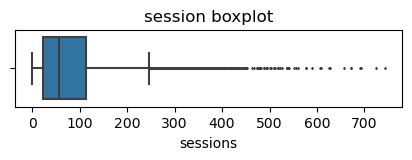

In [21]:
# box plot to find outliers for sessions
plt.figure(figsize = (5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('session boxplot')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


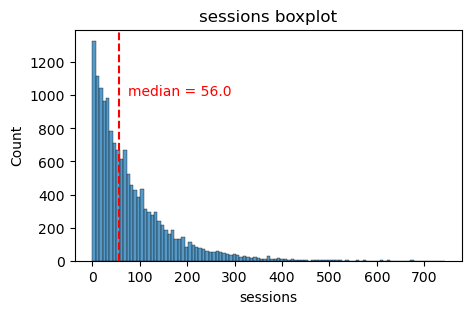

In [22]:
# visualize the distributions
plt.figure(figsize=(5,3))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
# print(median)
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1000, 'median = 56.0', color='red')
plt.title('sessions boxplot');

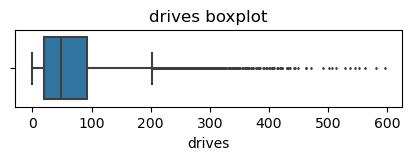

In [23]:
#boxplot for drives to find outliers
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('drives boxplot');

In [24]:
# to avoid repeating the code above, worth it to build a function
def histogrammer(column_str, median_text=True, **kwargs):
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)
    ax.axvline(median, color='red', linestyle='--')
    if median_text==True:
        ax.text(0.25,0.8, f'median={median}', color='red', 
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


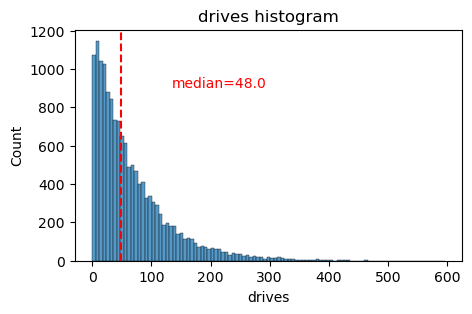

In [25]:
histogrammer('drives')

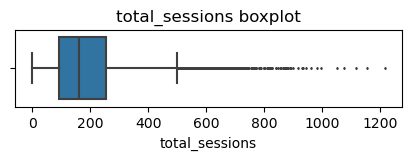

In [26]:
# boxplot for total sessions
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('total_sessions boxplot');

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


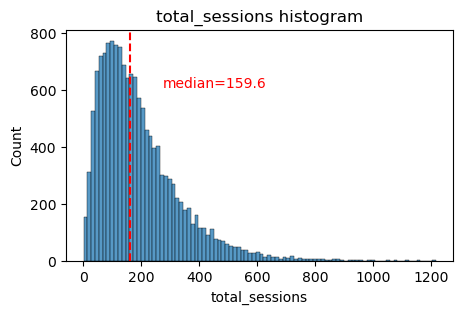

In [27]:
histogrammer('total_sessions')

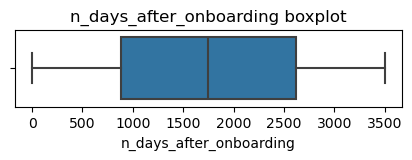

In [28]:
# box plot for onboarding days
plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'],fliersize=1)
plt.title('n_days_after_onboarding boxplot');

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Median: 1741.0


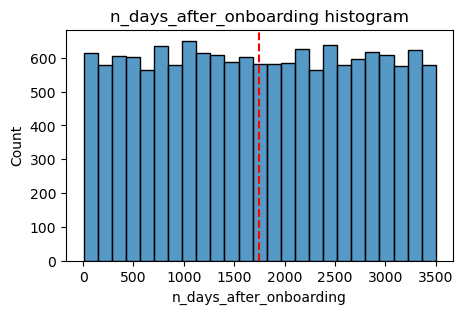

In [29]:
histogrammer('n_days_after_onboarding', median_text=False)

Text(0.5, 1.0, 'driven_km_drives boxplot')

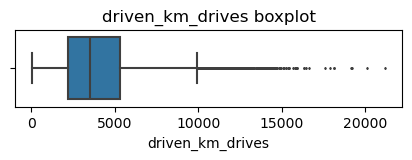

In [30]:
# boxplot for driven_km_drives
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives boxplot')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


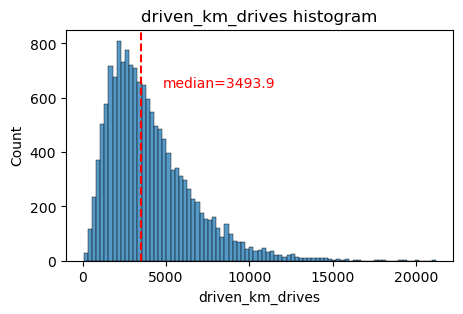

In [31]:
histogrammer('driven_km_drives')

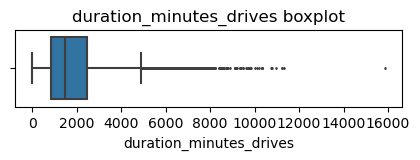

In [32]:
# boxplot for duration_minutes_drives
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives boxplot');

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


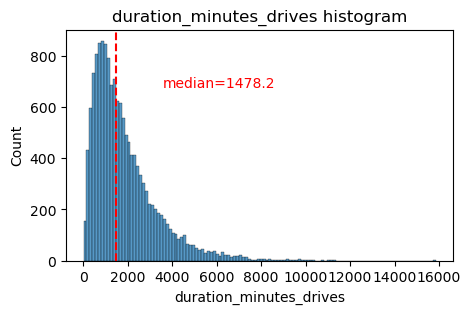

In [33]:
histogrammer('duration_minutes_drives')

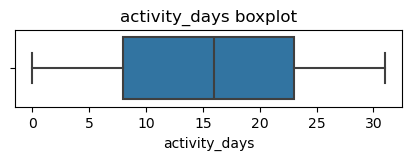

In [34]:
# boxplot for activity_days
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('activity_days boxplot');

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Median: 16.0


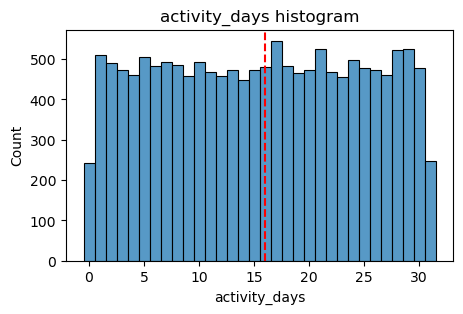

In [35]:
histogrammer('activity_days', median_text=False, discrete=True)

Text(0.5, 1.0, 'driving_days boxplot')

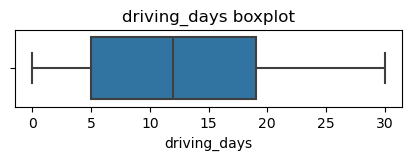

In [36]:
# boxplot for driving_days
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('driving_days boxplot')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


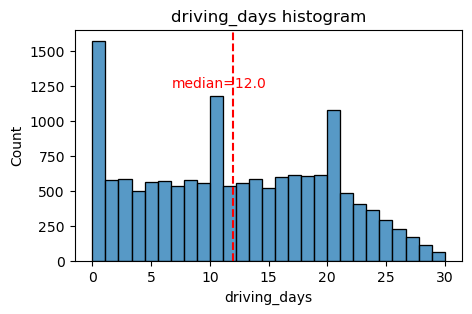

In [37]:
histogrammer('driving_days')

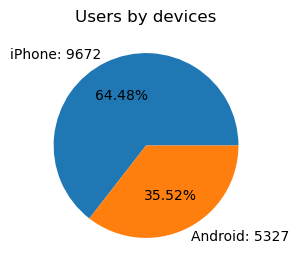

In [38]:
# categorical vaiablein a pie chart
fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.2f%%')
plt.title('Users by devices');
        

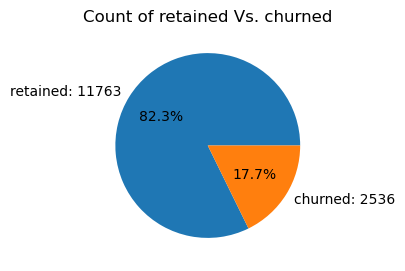

In [39]:
fig = plt.figure(figsize=(3,3))
data = df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
       )
plt.title('Count of retained Vs. churned');

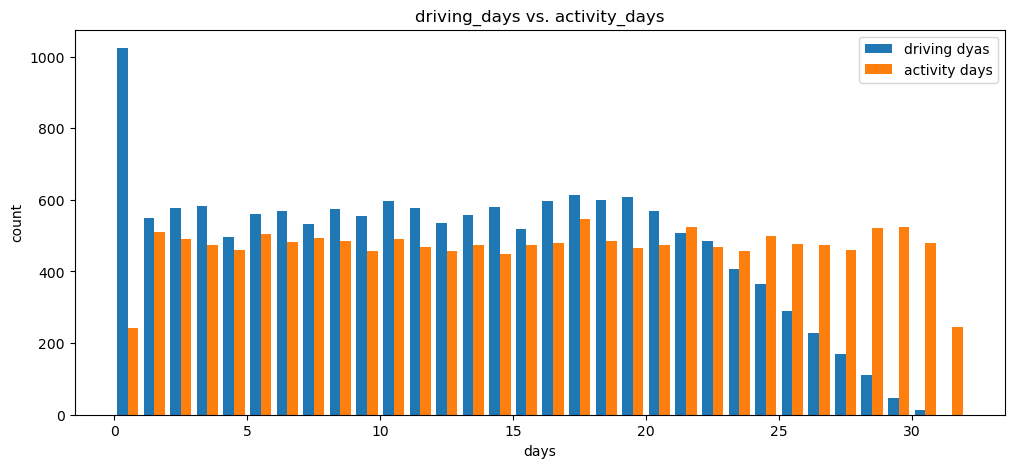

In [40]:
plt.figure(figsize=(12,5))
label=['driving dyas', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

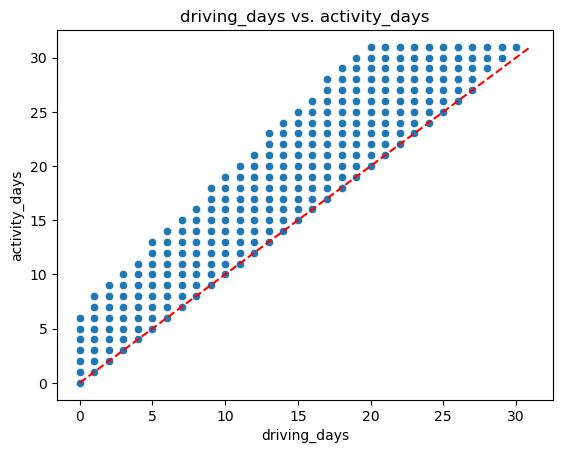

In [41]:
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


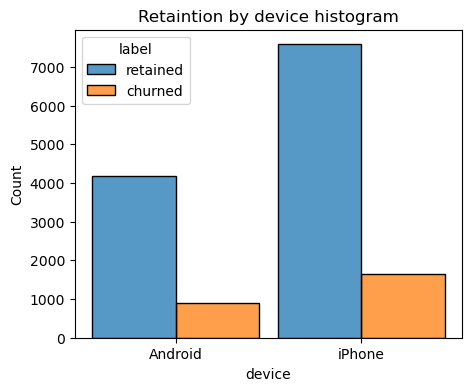

In [42]:
# retaintion by device
plt.figure(figsize=(5,4))
sns.histplot(data=df, 
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9)
plt.title('Retaintion by device histogram');

In [43]:
# km_per_driving_day 
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [44]:
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


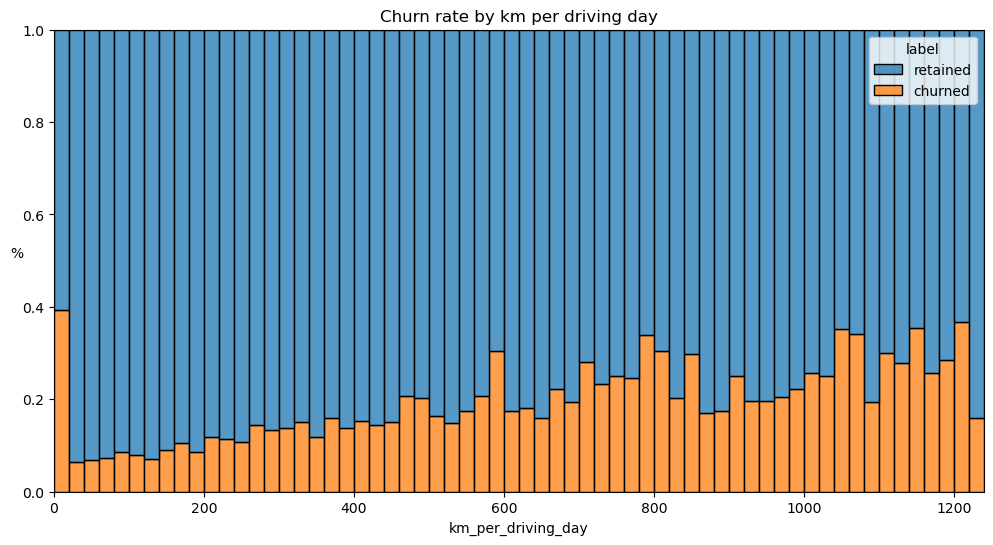

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0, 1250, 20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by km per driving day');

### The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous session. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


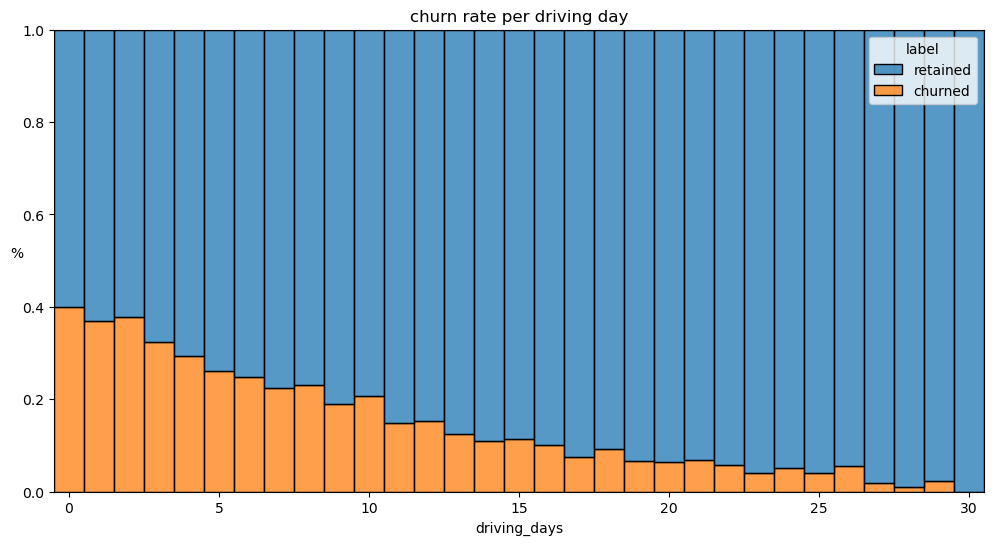

In [46]:
# relation to per driving day
plt.figure(figsize=(12, 6))
sns.histplot(data=df,
             x='driving_days',
             hue='label',
             bins=range(1,32),
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('churn rate per driving day');

### Number of driving days has a negative correlation witn shurn rate. 

In [47]:
# Have checked that no need to plot the relationship between km_per_drive, drives_per_driving_day

In [48]:
# Have checked percentage of sessions occurred in last month
# df['percentage_sessions_last_month'] = df['sessions'] / df['total_sessions']
# data = df.loc[df['percentage_sessions_last_month']>=0.4]
# plt.figure(figsize=(5,3))
# sns.histplot(x=data['n_days_after_onboarding'])
# plt.title('Num days after onboarding for users with >=40% sessions in last month');


### Summary:
1. Many column variables have outliers, important ones are sessions, drives, total_sessions, driven_km_drives, duration_minutes_drives
2. Seems that retained users have fewer km_per_driving_day than churned.
3. Seems that retained users with more driving days than churned.
### Communicating questions to stakeholders for further consideration: 
1. Driving_days max is different from activity_days max, which probably because the data collected for these two columns are not in the same month?
2. why the session in last month is so high? Need to check with Waze team in terms of data collection.

# Step 3: Hypothesis testing
### `Research question`: whether device type has a significant impact on number of drives?

In [49]:
from scipy import stats

In [50]:
# turn categroical data into integer like '1' for iPhone and '2' for Android
map_dictionary = {'Android': 2, 'iPhone': 1}
df['device_type'] = df['device']
df['device_type'] = df['device_type'].map(map_dictionary)
df['device_type'].head()

0    2
1    1
2    2
3    1
4    2
Name: device_type, dtype: int64

In [51]:
df.groupby('device_type')['drives'].mean()

device_type
1    67.859078
2    66.231838
Name: drives, dtype: float64

### **Hypotheses:**

#### $H_0$: There is no difference in average number of drives between drivers who use iPhone and Android

#### $H_A$: There is a difference in average number of drives between drivers who use iPhone and Android

#### Choose 5% as the significant level doing a two-sample t-test.

In [52]:
iPhone = df[df['device_type']==1]['drives']
Android = df[df['device_type']==2]['drives']
stats.ttest_ind(a=iPhone, b=Android, equal_var=False)

TtestResult(statistic=1.463523206885235, pvalue=0.143351972680206, df=11345.066049381952)

#### Since p-value is larger than 5%, fail to reject the null hypotheses. Conslusion is: there is not a significant statistical difference in the average number of drives bwtween drivers using iPhone and Android.

# Step4: Regression modeling building and prediction

In [53]:
# which model to build? -- Binormial logistic regression model. 
# why? - to predict whether users will stop using Waze app(churn or retain)


In [54]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [55]:
# do EDA again before constructing model
# especially on the outliers, extreme data values and missing values.

In [56]:
# df.info()

In [57]:
df = df.drop('ID', axis=1)

In [58]:
# df.info()
# df.describe()

In [59]:

df.loc[df['drives_per_driving_day']==np.inf, 'drives_per_driving_day']= 0
df.loc[df['km_per_drive']==np.inf, 'km_per_drive']= 0
df.describe()

sessions        drives  total_sessions  n_days_after_onboarding  \
count  14999.000000  14999.000000    14999.000000             14999.000000   
mean      80.633776     67.281152      189.964447              1749.837789   
std       80.699065     65.913872      136.405128              1008.513876   
min        0.000000      0.000000        0.220211                 4.000000   
25%       23.000000     20.000000       90.661156               878.000000   
50%       56.000000     48.000000      159.568115              1741.000000   
75%      112.000000     93.000000      254.192341              2623.500000   
max      743.000000    596.000000     1216.154633              3500.000000   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
count            14999.000000            14999.000000      14999.000000   
mean               121.605974               29.672512       4039.340921   
std                148.121544               45.394651       2502.149334   
min                  0.000000                0.000000         60.441250   
25%                  9.000000                0.000000       2212.600607   
50%                 71.000000                9.000000       3493.858085   
75%                178.000000               43.000000       5289.861262   
max               1236.000000              415.000000      21183.401890   

       duration_minutes_drives  activity_days  driving_days  km_per_drive  \
count             14999.000000   14999.000000  14999.000000  14999.000000   
mean               1860.976012      15.537102     12.179879    232.817946   
std                1446.702288       9.004655      7.824036    620.622351   
min                  18.282082       0.000000      0.000000      0.000000   
25%                 835.996260       8.000000      5.000000     32.424301   
50%                1478.249859      16.000000     12.000000     72.854343   
75%                2464.362632      23.000000     19.000000    179.347527   
max               15851.727160      31.000000     30.000000  15777.426560   

       km_per_driving_day  drives_per_driving_day   device_type  
count        14999.000000            14992.000000  14999.000000  
mean           578.963113                9.387368      1.355157  
std           1030.094384               19.826097      0.478577  
min              0.000000                0.000000      1.000000  
25%            136.238895                1.250000      1.000000  
50%            272.889272                3.666667      1.000000  
75%            558.686918                9.000000      2.000000  
max          15420.234110              395.000000      2.000000

In [60]:
# Using domain knowlede and intuition to determine the deciding thresholds
# the thresholds are arbitrary and adjustable
df['professional_driver'] = np.where((df['drives']>=60) & (df['driving_days']>=15), 1, 0)

In [61]:
df['professional_driver'].value_counts()

professional_driver
0    12405
1     2594
Name: count, dtype: int64

In [62]:
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

In [64]:
# decide which columns are wth high multicolliearity, need to drop them
# df = df.drop(columns=['km_per_drive', 'drives_per_driving_day', 'percentage_sessions_last_month', 'device_type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_drive             14999 non-null  float64
 13  km_per_driving_day       14999 non-null  float64
 14  drives_per_driving_day

In [65]:
# drop rows with missing data in label column
df = df.dropna(subset=['label'])

In [66]:
# replace the outliers with the threshold value
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold=df[column].quantile(0.95)
    df.loc[df[column]>threshold, column] = threshold
    

In [67]:
df.describe()

sessions        drives  total_sessions  n_days_after_onboarding  \
count  14299.000000  14299.000000    14299.000000             14299.000000   
mean      76.539688     63.964683      183.717304              1751.822505   
std       67.243178     55.127927      118.720520              1008.663834   
min        0.000000      0.000000        0.220211                 4.000000   
25%       23.000000     20.000000       90.457733               878.500000   
50%       56.000000     48.000000      158.718571              1749.000000   
75%      111.000000     93.000000      253.540450              2627.500000   
max      243.000000    200.000000      455.439492              3500.000000   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
count            14299.000000            14299.000000      14299.000000   
mean               114.562767               27.187216       3944.558631   
std                124.378550               36.715302       2218.358258   
min                  0.000000                0.000000         60.441250   
25%                 10.000000                0.000000       2217.319909   
50%                 71.000000                9.000000       3496.545617   
75%                178.000000               43.000000       5299.972162   
max                422.000000              124.000000       8898.716275   

       duration_minutes_drives  activity_days  driving_days  km_per_drive  \
count             14299.000000   14299.000000  14299.000000  14299.000000   
mean               1792.911210      15.544653     12.182530    232.269197   
std                1224.329759       9.016088      7.833835    616.197409   
min                  18.282082       0.000000      0.000000      0.000000   
25%                 840.181344       8.000000      5.000000     32.486524   
50%                1479.394387      16.000000     12.000000     72.947059   
75%                2466.928876      23.000000     19.000000    179.347527   
max                4668.180092      31.000000     30.000000  15777.426560   

       km_per_driving_day  drives_per_driving_day   device_type  \
count        14299.000000            14292.000000  14299.000000   
mean           581.942399                9.365001      1.354850   
std           1038.254509               19.738651      0.478485   
min              0.000000                0.000000      1.000000   
25%            136.168003                1.230769      1.000000   
50%            273.301012                3.666667      1.000000   
75%            558.018761                9.000000      2.000000   
max          15420.234110              395.000000      2.000000   

       professional_driver  
count         14299.000000  
mean              0.173998  
std               0.379121  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               0.000000  
max               1.000000

In [68]:
# encode categorical variables
df['label_encoded'] = np.where(df['label']=='churned', 1, 0)
df[['label','label_encoded']].head(10)

/var/folders/cl/yjhqf_3j4n13tqzcptwgl5xc0000gp/T/ipykernel_79767/1393007886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_encoded'] = np.where(df['label']=='churned', 1, 0)


label  label_encoded
0  retained              0
1  retained              0
2  retained              0
3  retained              0
4  retained              0
5  retained              0
6  retained              0
7  retained              0
8  retained              0
9   churned              1

In [69]:
# check assumptions for logistic regression:
# 1. independent observations(how data was collected)
# 2. No extreme outliers
# 3. Little or no multicollinearity among X predictors
# 4. Linear relationship between X and the logit of y
## but even if modeling assumptions are often violated depending on the specifics of use case 
## and the severity of the violation, it might not affect model nuch or result in a failed model.

In [74]:
df.head()
#df.corr(method='pearson')

label  sessions  drives  total_sessions  n_days_after_onboarding  \
0  retained       243     200      296.748273                     2276   
1  retained       133     107      326.896596                     1225   
2  retained       114      95      135.522926                     2651   
3  retained        49      40       67.589221                       15   
4  retained        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64       8898.716275   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days   device  \
0              1985.775061             28            19  Android   
1              3160.472914             13            11   iPhone   
2              1610.735904             14             8  Android   
3               587.196542              7             3   iPhone   
4              1219.555924             27            18  Android   

   km_per_drive  km_per_driving_day  drives_per_driving_day  device_type  \
0     11.632058          138.360267               11.894737            2   
1    128.186173         1246.901868                9.727273            1   
2     32.201567          382.393602               11.875000            2   
3     22.839778          304.530374               13.333333            1   
4     58.091206          219.455667                3.777778            2   

   professional_driver  label_encoded  
0                    1              0  
1                    0              0  
2                    0              0  
3                    0              0  
4                    1              0

In [76]:
df_no_cat = df.drop(columns = ['label', 'device'])

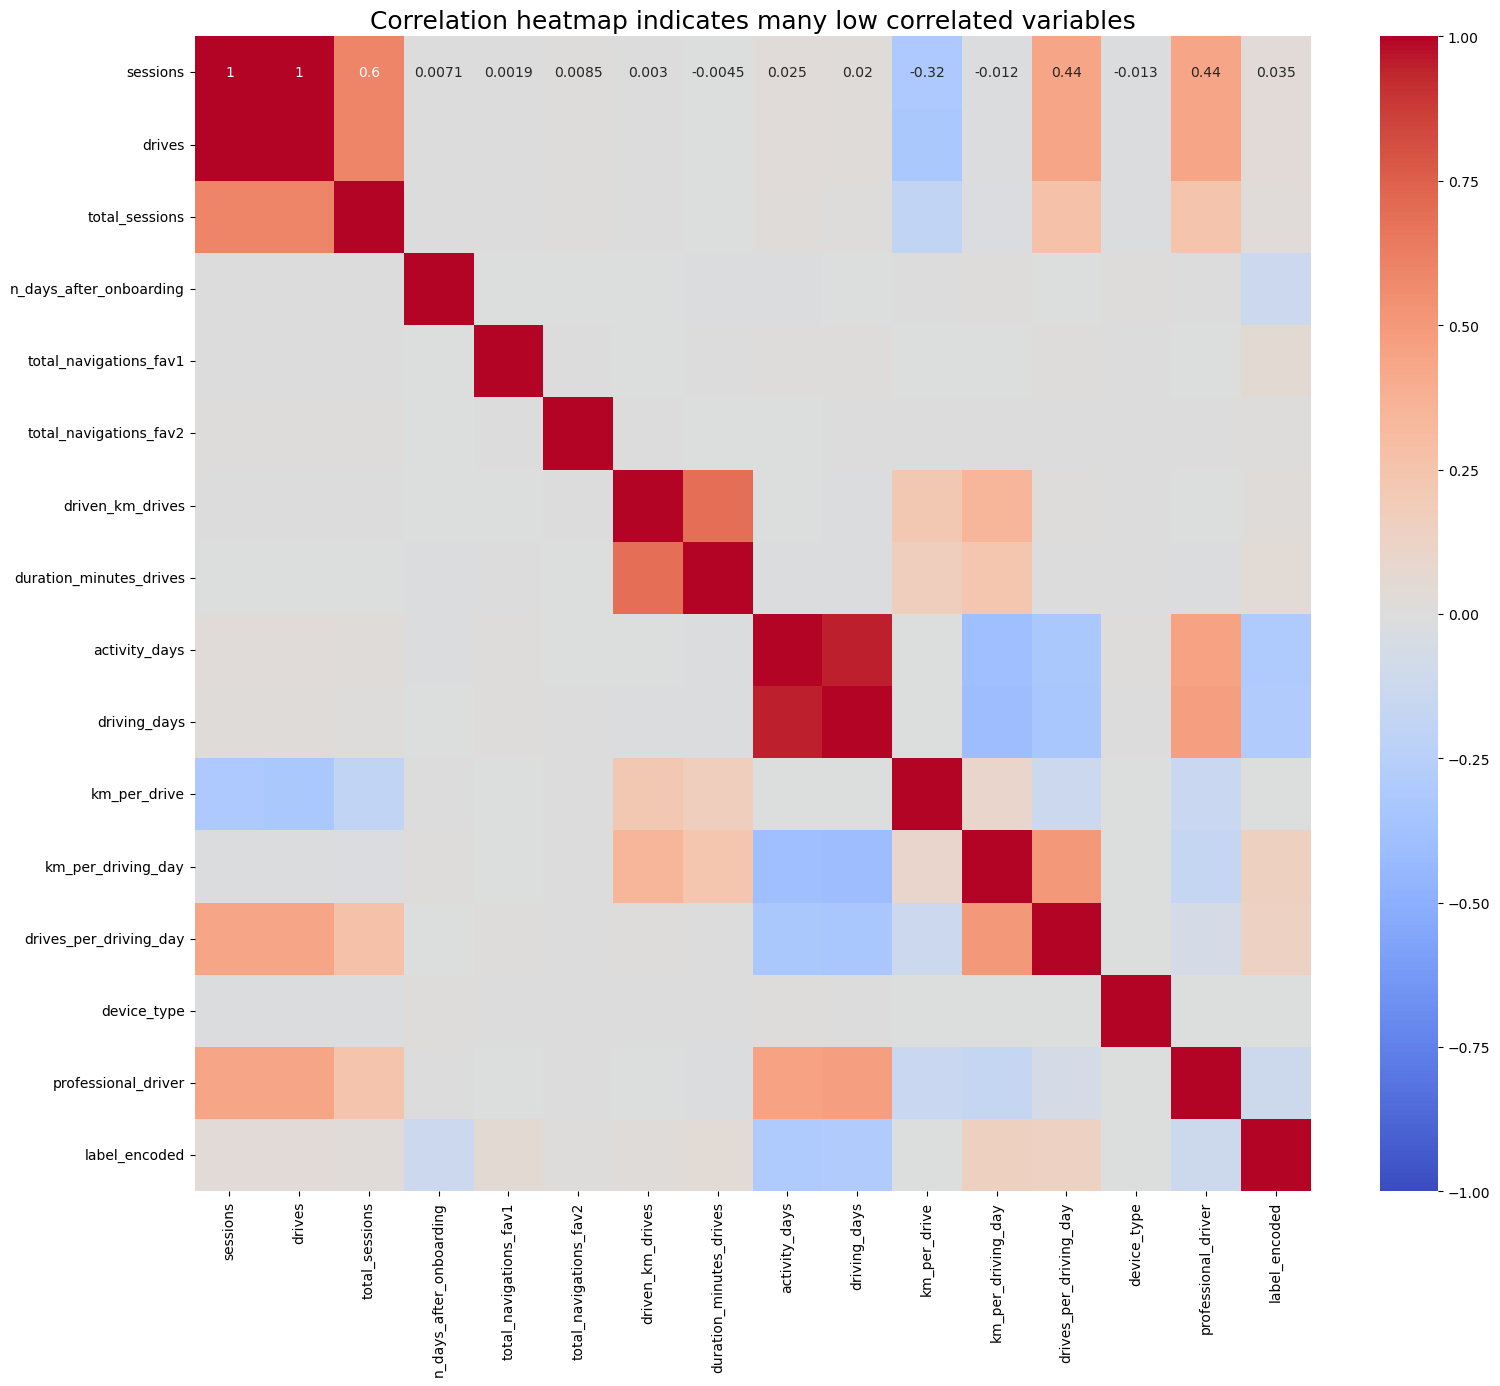

In [79]:
plt.figure(figsize=(18,15))
sns.heatmap(df_no_cat.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables', fontsize=18)
plt.show()

### Conclusion:
#### 1. sessions and drives are multicollinear with each other
#### 2. driving_days and activity_days are multicollinear with each other

## Model building:
### 1. The model is purposed to predict the label_encoded(y)
### 2. Need to drop certain columns like label, label_encoded, device.
### 3. 'sessions' and 'driving_days' are selected to be dropped instead of 'drives' and 'activity_days' for stronger correlation.(shown as below after imput outliers)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


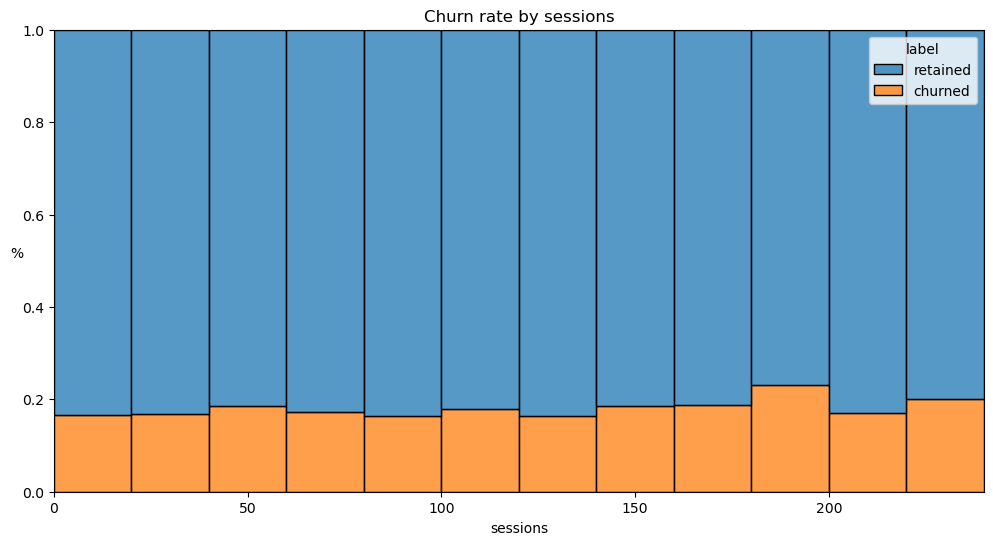

In [82]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,
             x='sessions',
             bins=range(0, 250, 20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by sessions');

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


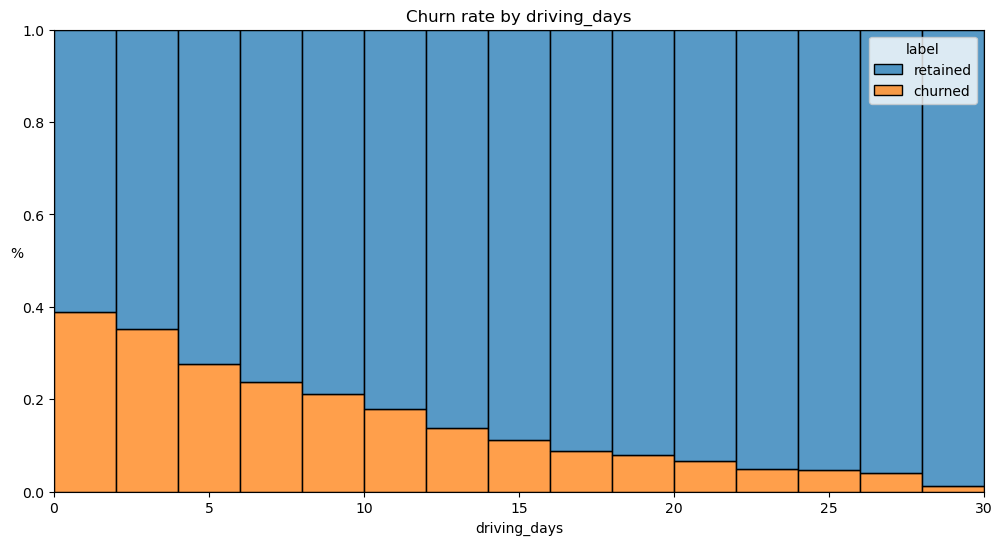

In [81]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,
             x='driving_days',
             bins=range(0, 31, 2),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by driving_days');

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


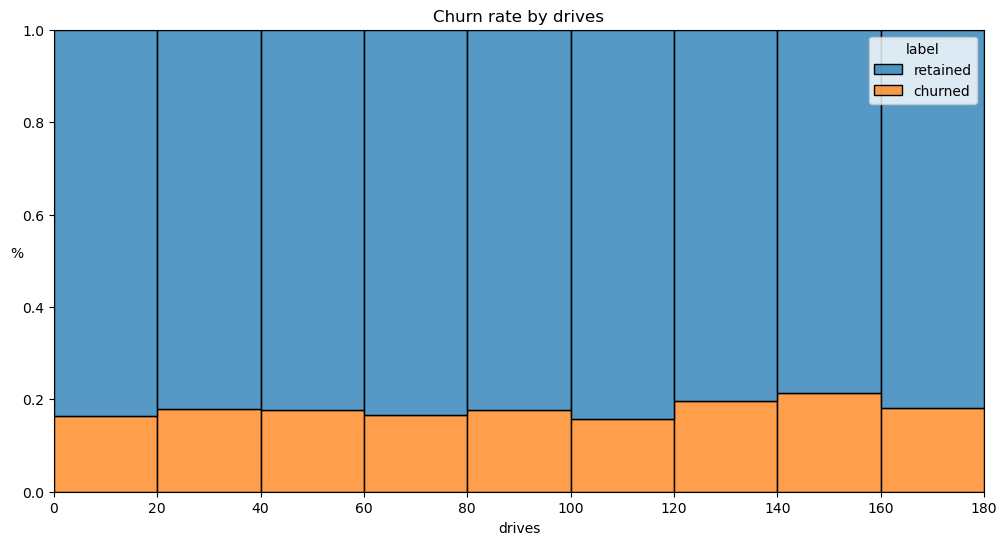

In [83]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,
             x='drives',
             bins=range(0, 200, 20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by drives');

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


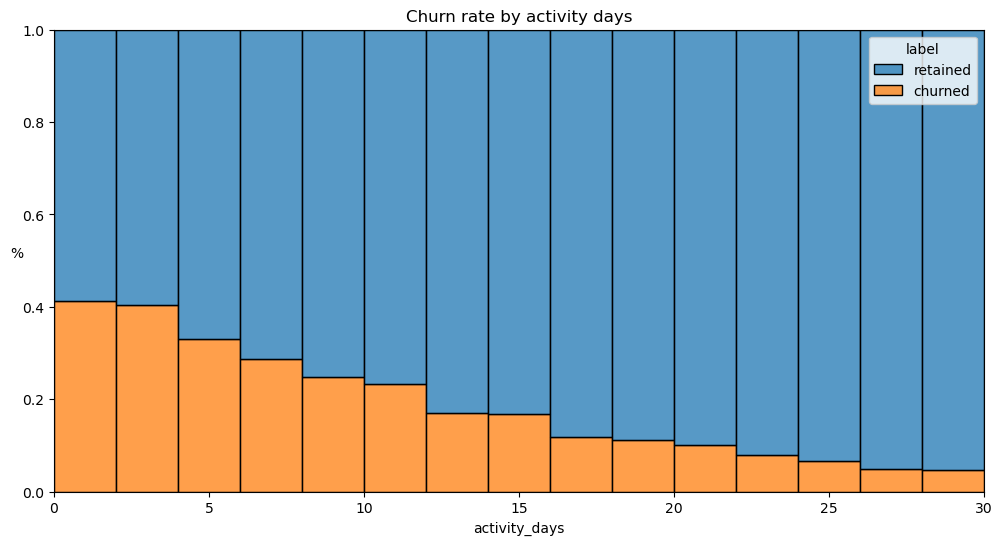

In [85]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,
             x='activity_days',
             bins=range(0, 31, 2),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by activity days');

In [120]:
df_model = df.copy()
df_model.describe()

sessions        drives  total_sessions  n_days_after_onboarding  \
count  14299.000000  14299.000000    14299.000000             14299.000000   
mean      76.539688     63.964683      183.717304              1751.822505   
std       67.243178     55.127927      118.720520              1008.663834   
min        0.000000      0.000000        0.220211                 4.000000   
25%       23.000000     20.000000       90.457733               878.500000   
50%       56.000000     48.000000      158.718571              1749.000000   
75%      111.000000     93.000000      253.540450              2627.500000   
max      243.000000    200.000000      455.439492              3500.000000   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
count            14299.000000            14299.000000      14299.000000   
mean               114.562767               27.187216       3944.558631   
std                124.378550               36.715302       2218.358258   
min                  0.000000                0.000000         60.441250   
25%                 10.000000                0.000000       2217.319909   
50%                 71.000000                9.000000       3496.545617   
75%                178.000000               43.000000       5299.972162   
max                422.000000              124.000000       8898.716275   

       duration_minutes_drives  activity_days  driving_days  km_per_drive  \
count             14299.000000   14299.000000  14299.000000  14299.000000   
mean               1792.911210      15.544653     12.182530    232.269197   
std                1224.329759       9.016088      7.833835    616.197409   
min                  18.282082       0.000000      0.000000      0.000000   
25%                 840.181344       8.000000      5.000000     32.486524   
50%                1479.394387      16.000000     12.000000     72.947059   
75%                2466.928876      23.000000     19.000000    179.347527   
max                4668.180092      31.000000     30.000000  15777.426560   

       km_per_driving_day  drives_per_driving_day   device_type  \
count        14299.000000            14292.000000  14299.000000   
mean           581.942399                9.365001      1.354850   
std           1038.254509               19.738651      0.478485   
min              0.000000                0.000000      1.000000   
25%            136.168003                1.230769      1.000000   
50%            273.301012                3.666667      1.000000   
75%            558.018761                9.000000      2.000000   
max          15420.234110              395.000000      2.000000   

       professional_driver  label_encoded  
count         14299.000000   14299.000000  
mean              0.173998       0.177355  
std               0.379121       0.381982  
min               0.000000       0.000000  
25%               0.000000       0.000000  
50%               0.000000       0.000000  
75%               0.000000       0.000000  
max               1.000000       1.000000

In [121]:
X = df_model.drop(columns= ['label','label_encoded', 'device', 'sessions', 'driving_days', 'km_per_drive', 'drives_per_driving_day'])
X[X.isna().any(axis=1)]

Empty DataFrame
Columns: [drives, total_sessions, n_days_after_onboarding, total_navigations_fav1, total_navigations_fav2, driven_km_drives, duration_minutes_drives, activity_days, km_per_driving_day, device_type, professional_driver]
Index: []

In [122]:
y=df_model['label_encoded']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [127]:
X_train.head()

drives  total_sessions  n_days_after_onboarding  \
152       108      186.192746                     3116   
11899       2        3.487590                      794   
10937     139      347.106403                      331   
669       108      455.439492                     2320   
8406       10       89.475821                     2478   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
152                       243                     124       8898.716275   
11899                     114                      18       3286.545691   
10937                       4                       7       7400.838975   
669                        11                       4       6566.424830   
8406                      135                       0       1271.248661   

       duration_minutes_drives  activity_days  km_per_driving_day  \
152                4668.180092             24          612.305861   
11899              1780.902733              5         3286.545691   
10937              2349.305267             15          616.736581   
669                4558.459870             18          410.401552   
8406                938.711572             27           74.779333   

       device_type  professional_driver  
152              1                    1  
11899            1                    0  
10937            2                    0  
669              1                    1  
8406             1                    0

In [130]:
model = LogisticRegression(penalty=None, max_iter=400)
model.fit(X_train, y_train)

LogisticRegression(max_iter=400, penalty=None)

In [131]:
pd.Series(model.coef_[0], index=X.columns)

drives                     0.001914
total_sessions             0.000330
n_days_after_onboarding   -0.000406
total_navigations_fav1     0.001233
total_navigations_fav2     0.000935
driven_km_drives          -0.000015
duration_minutes_drives    0.000109
activity_days             -0.105997
km_per_driving_day         0.000018
device_type               -0.002377
professional_driver       -0.001528
dtype: float64

In [132]:
model.intercept_

array([-0.00170916])

In [135]:
# check final assumption
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.93944951, 0.06055049],
       [0.61966555, 0.38033445],
       [0.76498031, 0.23501969],
       ...,
       [0.9189983 , 0.0810017 ],
       [0.85070824, 0.14929176],
       [0.9349995 , 0.0650005 ]])

In [139]:
# check whether log-odds of dependent variable respect to the predictor variable be linear
logit_data=X_train.copy()

In [140]:
logit_data['logit']=[np.log(prob[1] / prob[0]) for prob in training_probabilities]

Text(0.5, 1.0, 'Log-odds: activity_days')

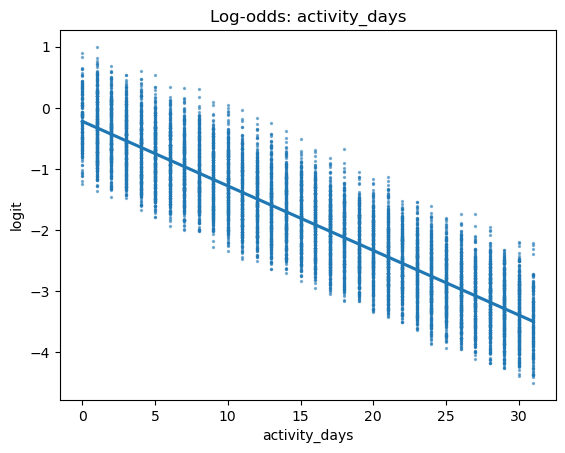

In [141]:
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days')

In [142]:
# generate prediction on X_test
y_pred=model.predict(X_test)

In [143]:
model.score(X_test, y_test)

0.8237762237762237

In [144]:
# confusion martix
cm = confusion_matrix(y_test, y_pred)

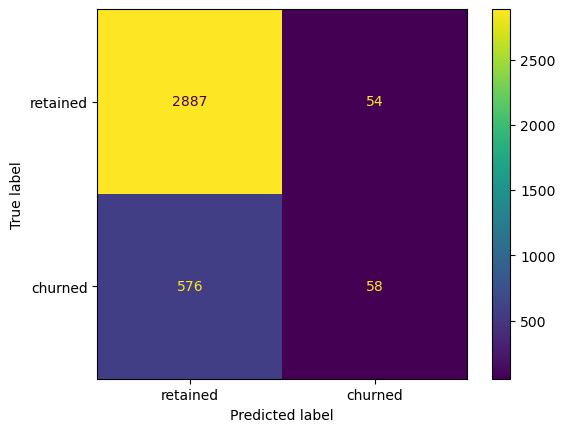

In [146]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'])
disp.plot();

In [148]:
# precision
precision = cm[1,1] / (cm[0,1] + cm[1,1])
precision

0.5178571428571429

In [149]:
# recall
recall = cm[1,1] / (cm[1,0] + cm[1,1])
recall

0.0914826498422713

In [151]:
# classification
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



### The model has mediocre precision and very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

## Summary and coomunications to stakeholders:
1. activity_days is the most important feature in the model as shown in updated correlation bar above without outliers. It has a negative correlation with the churn rate. No surprising because activity_days is very correlated with driving_days which is shown in first stage EDA
2. km_per_driving_day has the strongest positive correlation with churn rate.
3. In a multiple logistic regression model, features can interact with each other and these interactions can result in seemingly counterintuitive relationships. This is both a strength and a weakness of predictive models, as capturing these interactions typically makes a model more predictive while at the same time making the model more difficult to explain.
4. If the model is used to drive consequential business decisions, then it is not recommended. The model is not a strong enough predictor, as made clear by its poor recall score.
5. Might need to reconstruct the model with different combinations of predicator variables to reduce noise.
6. It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs